<h1 style="font-size:300%; font-family:cursive; background:#ff6666; color:white; text-align:center; border:10px solid ; padding:25px;"> PREDICTING HEART PATIENTS </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\wozti\heart patients\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h2 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Exploratory Data Analysis (EDA) :</b><h2>

Here we are going to do; <br>

**1 Univariate and Bivariate analysis** <br>

**2 Handling missing value** <br> 

**3 Encoding** <br> 

**4 Standarization** <br>

**5 Correlation matrix & Variance Inflation Factor (VIF)** <br>

**6 Handling Outliers** <br>





<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>1 Univariate & Bivariate Analysis</b></h3></center>


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

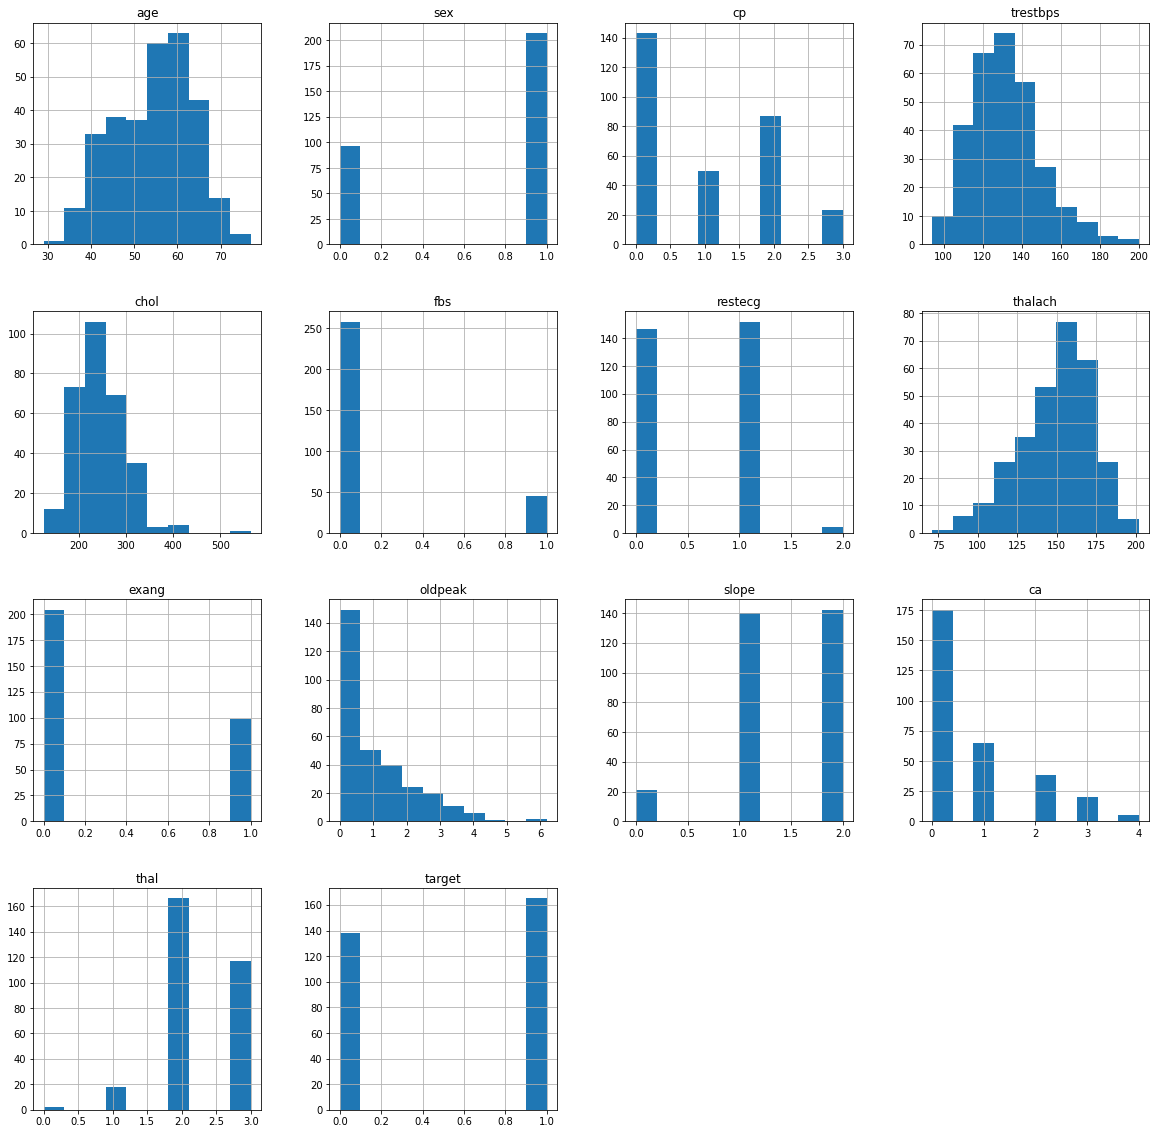

In [6]:
df.hist(figsize=(20,20))

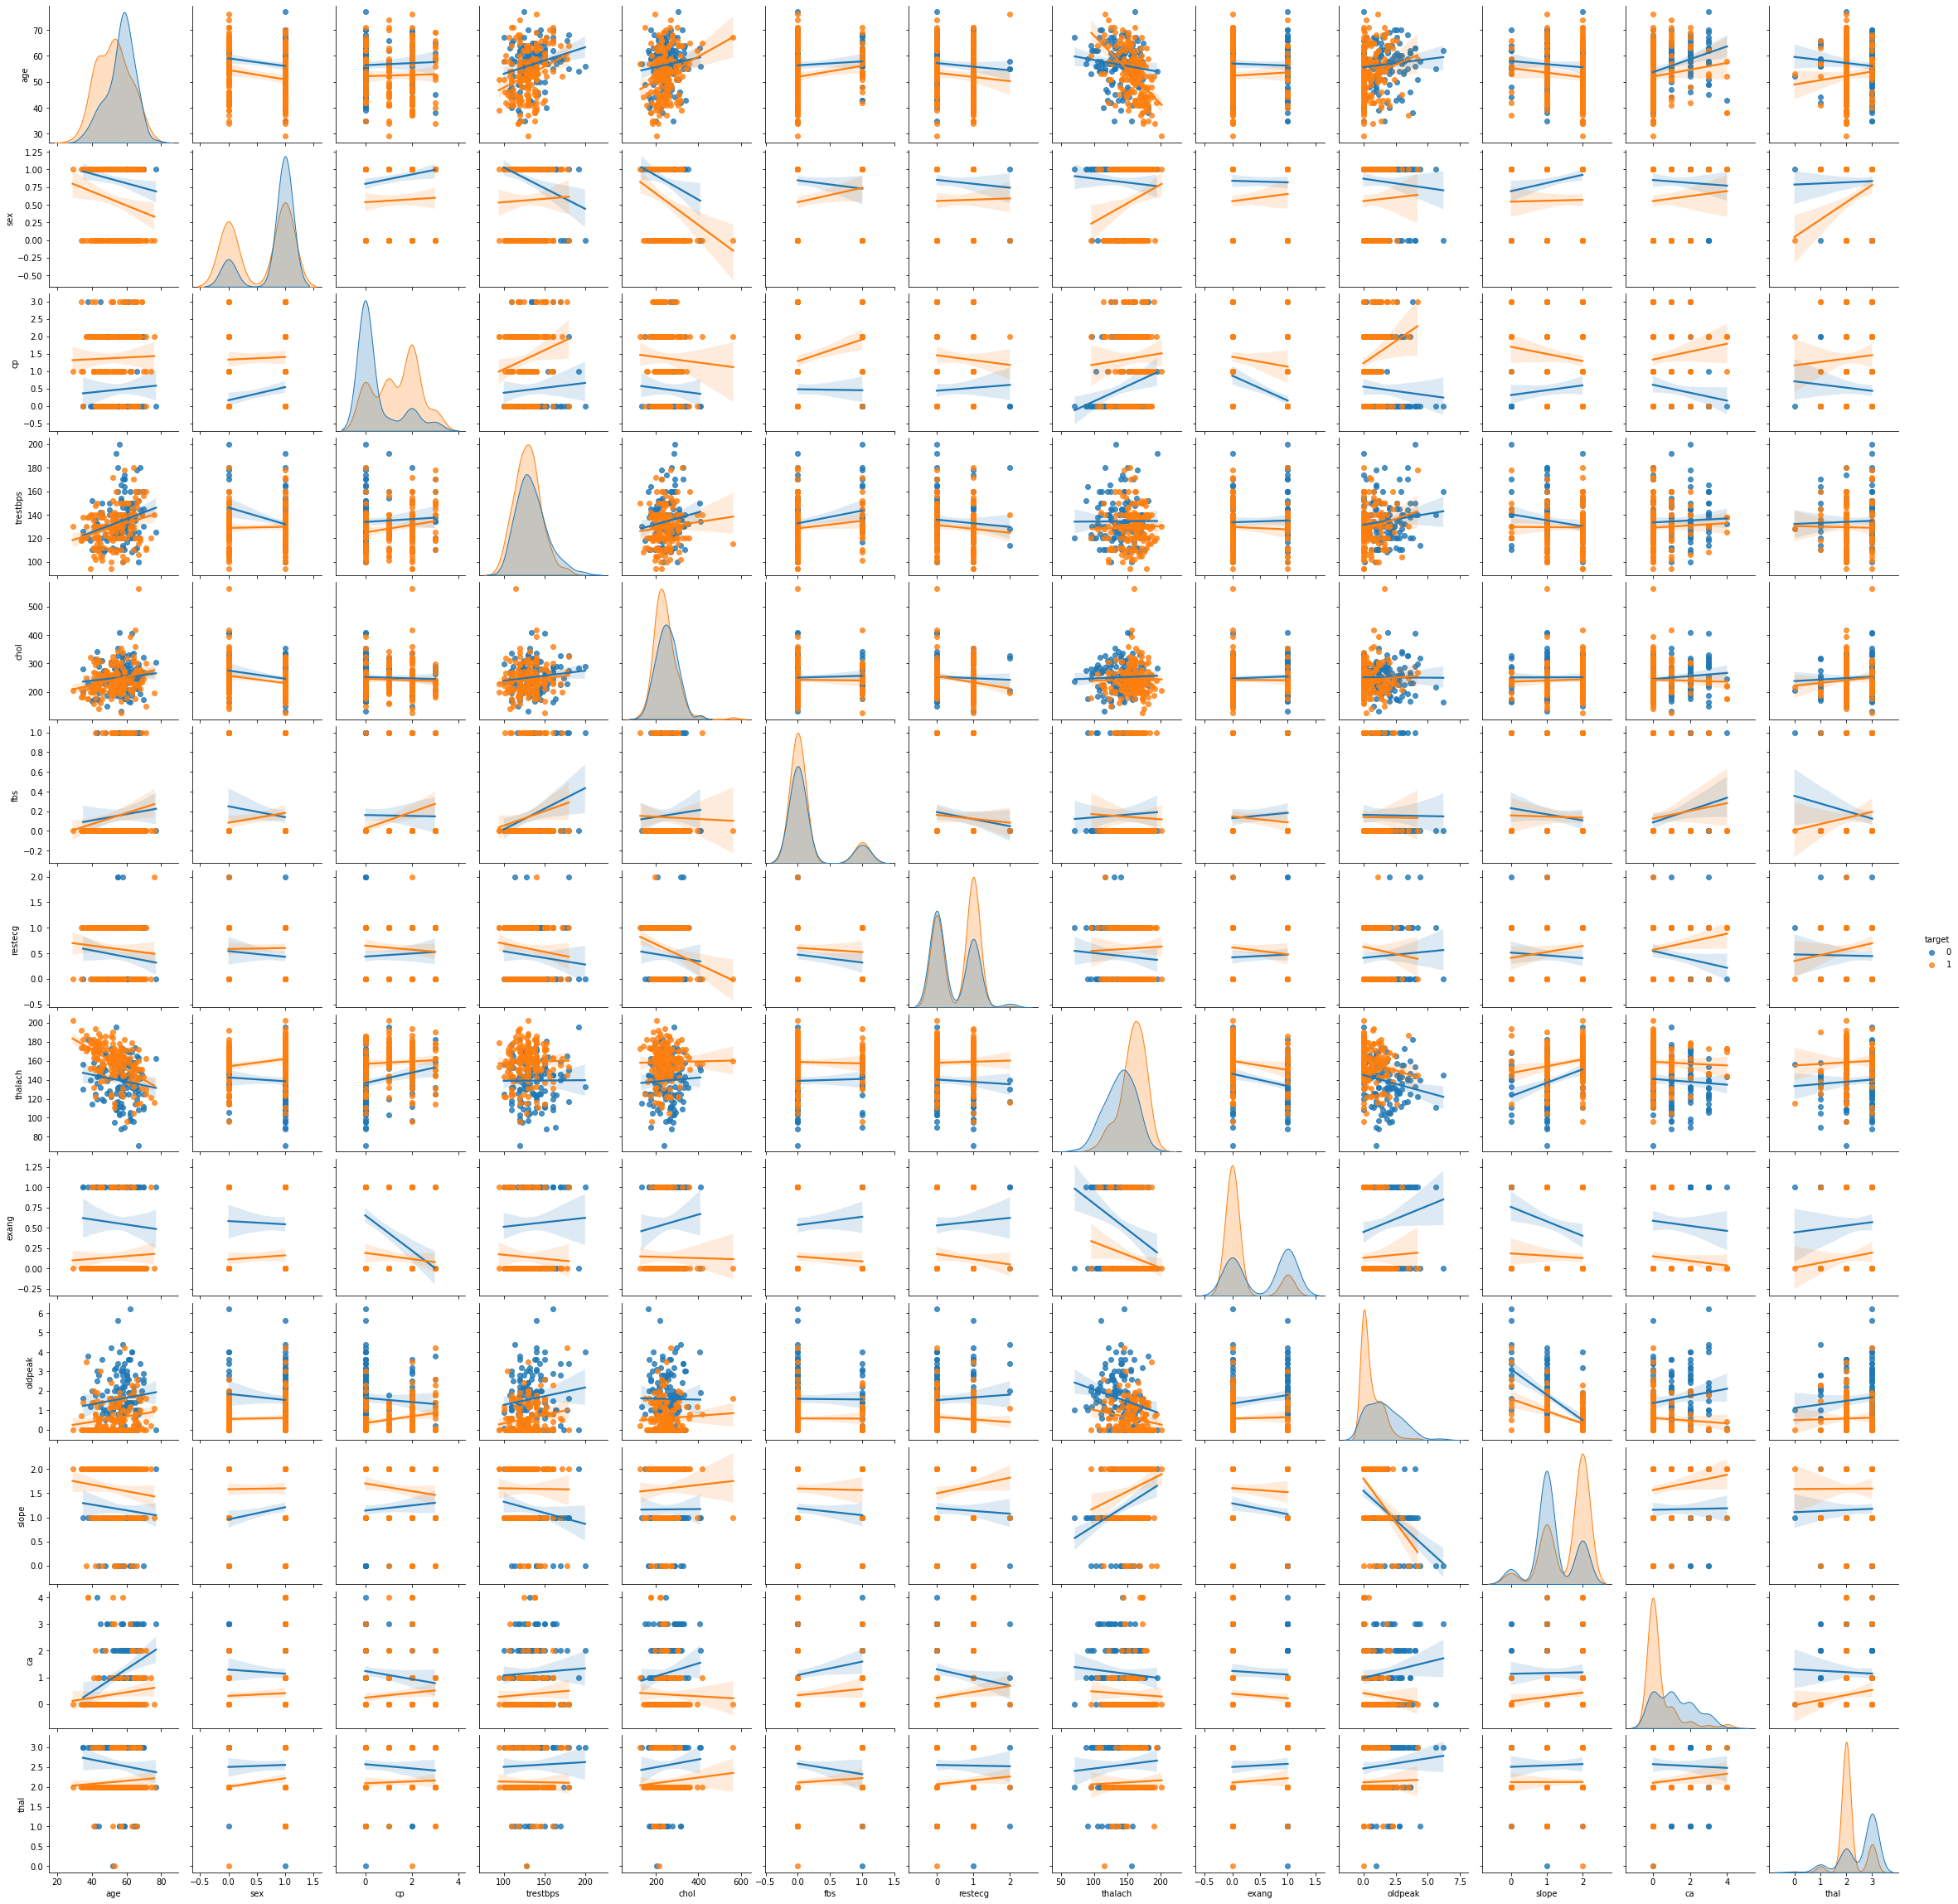

In [7]:
sb.pairplot(df,hue="target",kind='reg')

In [8]:
df.columns[:13]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

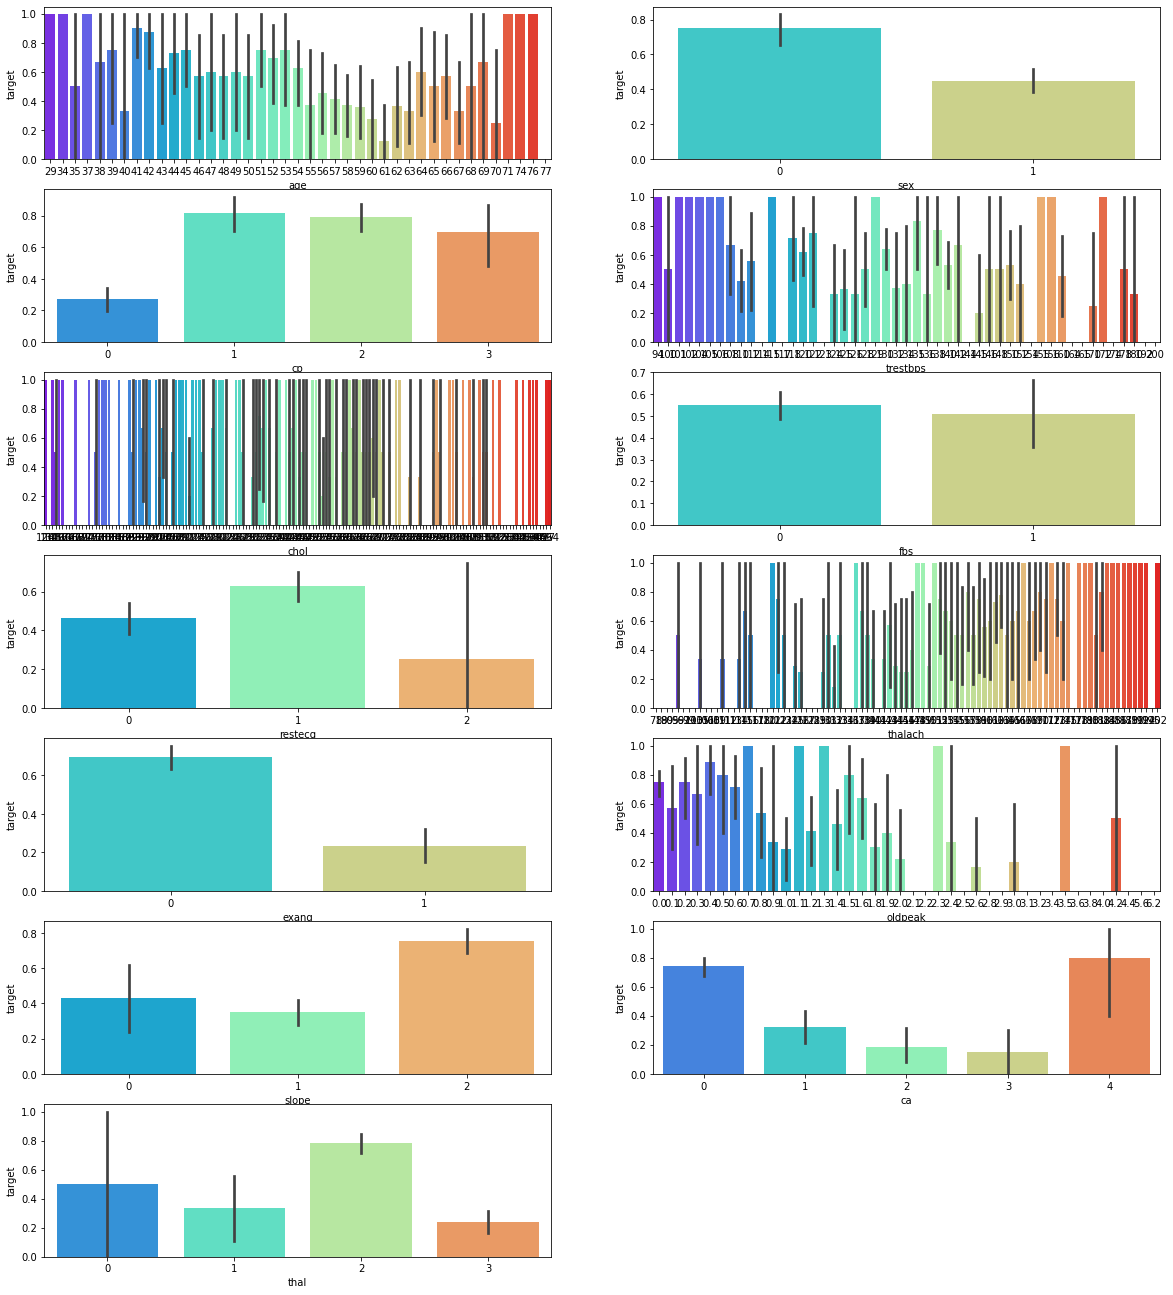

In [9]:
plt.figure(figsize=[20,23])
features = df.columns[:13]
n=1

for f in features:
    plt.subplot(7,2,n)
    sb.barplot(x=f,y='target',data=df,palette='rainbow')
    n=n+1


<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>2 Handling Missing Value</b></h3></center>


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Here there is no missing value

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>3 Encoding</b></h3></center>


no need of doing encoding

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>4 Standarization</b></h3></center>


In [11]:

scaled= StandardScaler()
columns_to_scale = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
columns_to_scale
df.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
df[columns_to_scale] = scaled.fit_transform(df[columns_to_scale])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>5 Correlation matrix & Variance Inflation Factor (VIF)</b></h3></center>


<AxesSubplot:>

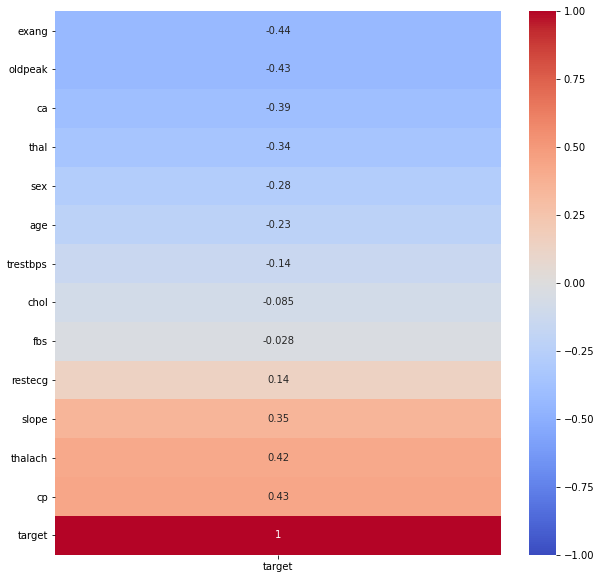

In [12]:
#calculating the correlation matrix
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr()[['target']].sort_values(by='target'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1)

# Variance Inflation Factor

Here no need to check VIF

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>6 Handling Outliers</b></h3></center>


In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


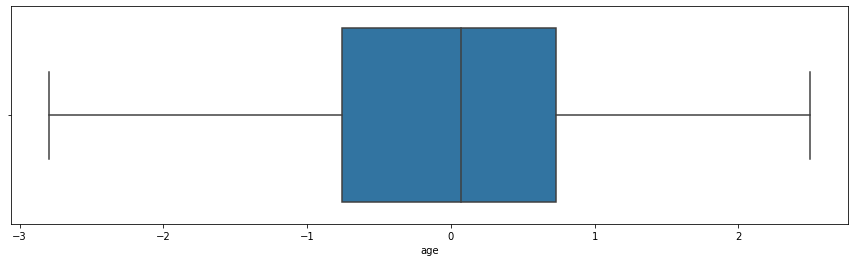

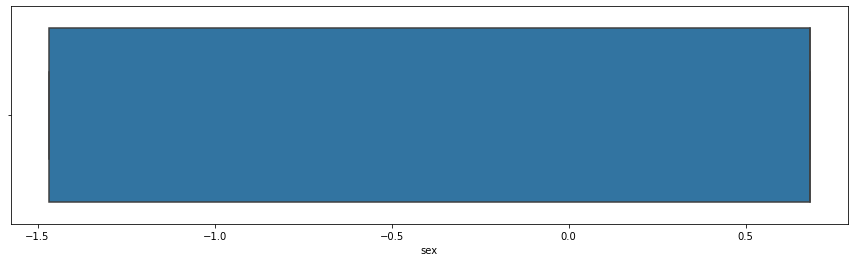

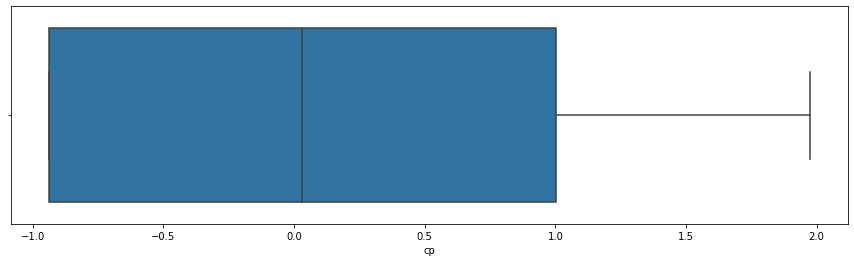

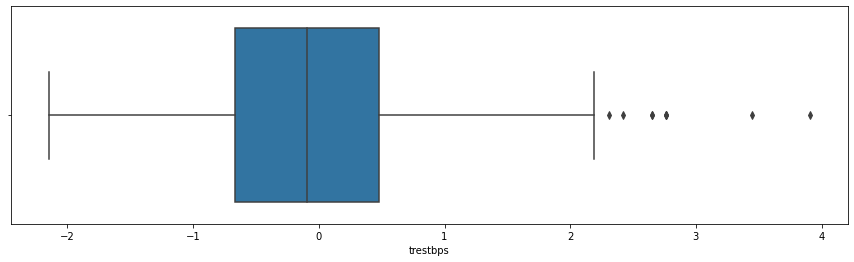

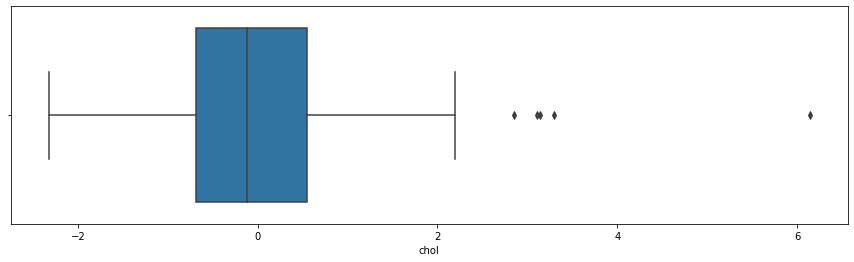

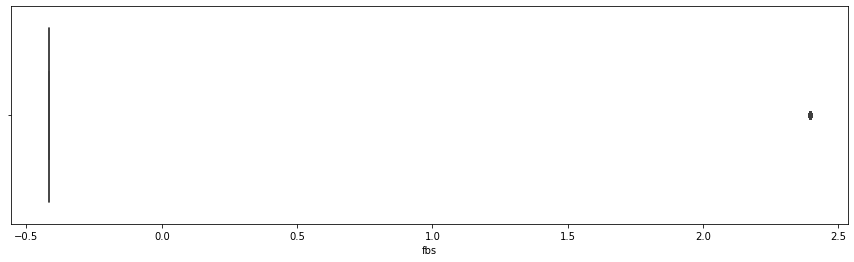

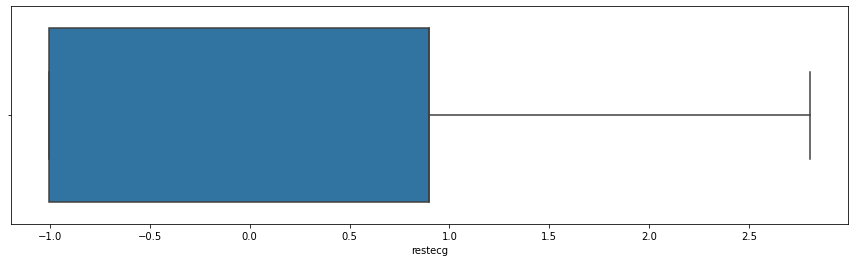

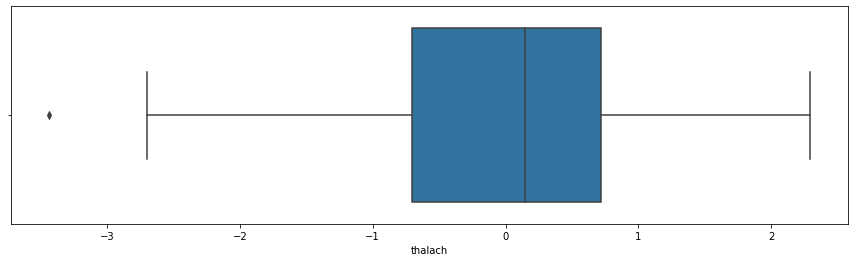

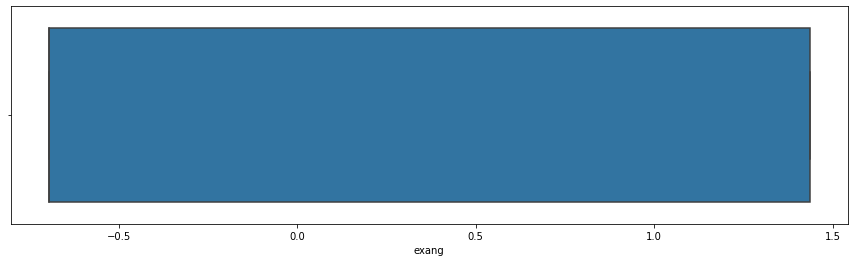

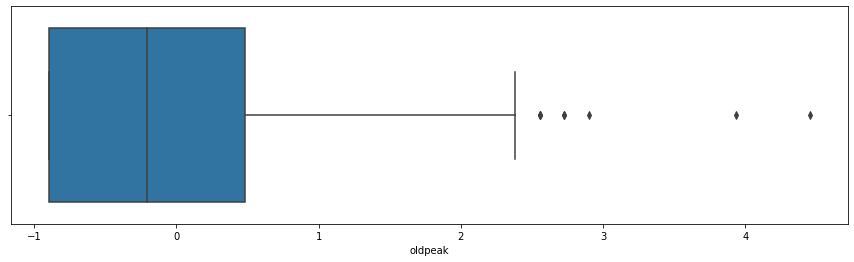

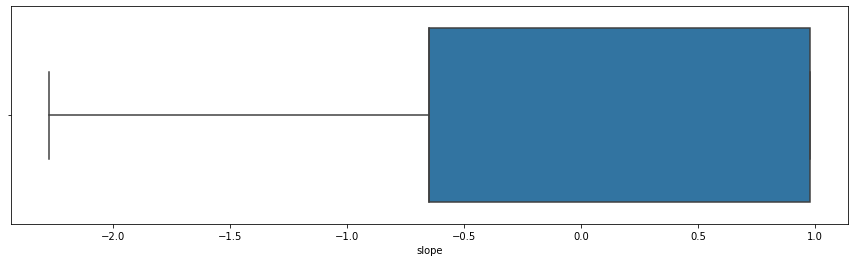

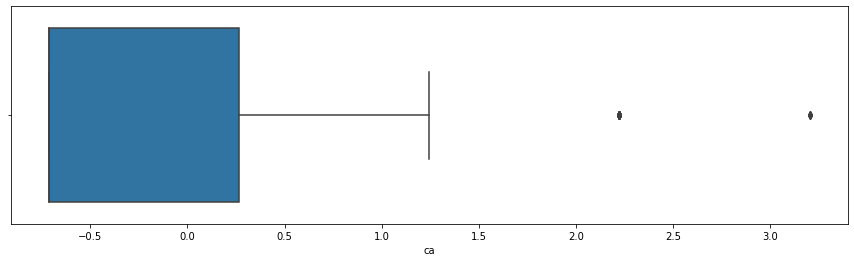

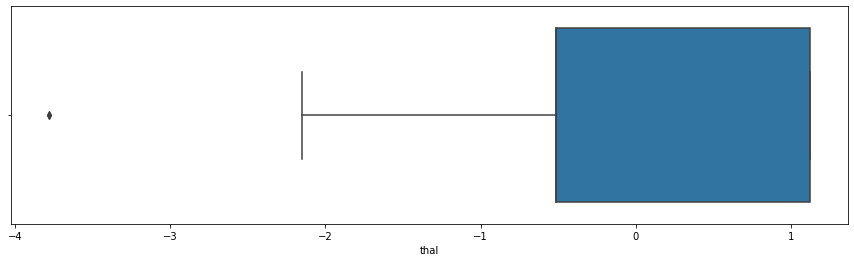

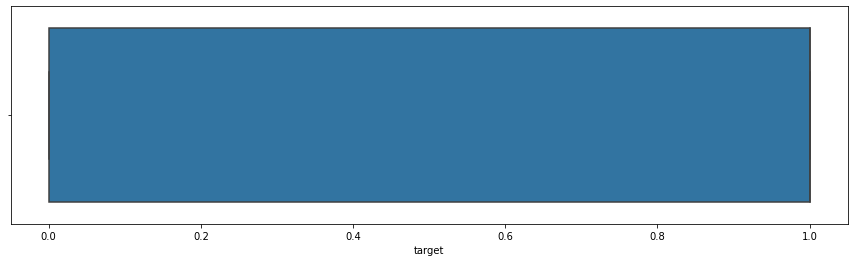

In [14]:
num_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','target']

for i in range(len(num_cols)):
    fig = plt.figure(figsize=[15,4])

    sb.boxplot(x=num_cols[i], data=df)

  
    
    plt.show()

In [15]:
#calculating the Interquartile range of Selling_Price
IQR=df.trestbps.quantile(0.75)-df.trestbps.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df['trestbps'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['trestbps'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df.loc[df['trestbps']>=upper_bridge,'trestbps']=upper_bridge

In [16]:
#calculating the Interquartile range of Selling_Price
IQR=df.chol.quantile(0.75)-df.chol.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df['chol'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['chol'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df.loc[df['chol']>=upper_bridge,'chol']=upper_bridge

In [17]:
#calculating the Interquartile range of Selling_Price
IQR=df.thalach.quantile(0.75)-df.thalach.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df['thalach'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['thalach'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df.loc[df['thalach']>=upper_bridge,'thalach']=upper_bridge

In [18]:
#calculating the Interquartile range of Selling_Price
IQR=df.oldpeak.quantile(0.75)-df.oldpeak.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df['oldpeak'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['oldpeak'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df.loc[df['oldpeak']>=upper_bridge,'oldpeak']=upper_bridge

In [19]:
#calculating the Interquartile range of Selling_Price
IQR=df.ca.quantile(0.75)-df.ca.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df['ca'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['ca'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df.loc[df['ca']>=upper_bridge,'ca']=upper_bridge

In [20]:
#calculating the Interquartile range of Selling_Price
IQR=df.fbs.quantile(0.75)-df.fbs.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df['fbs'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['fbs'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df.loc[df['fbs']>=upper_bridge,'fbs']=upper_bridge

In [21]:
#calculating the Interquartile range of Selling_Price
IQR=df.thal.quantile(0.75)-df.thal.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df['thal'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['thal'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df.loc[df['thal']>=upper_bridge,'thal']=upper_bridge

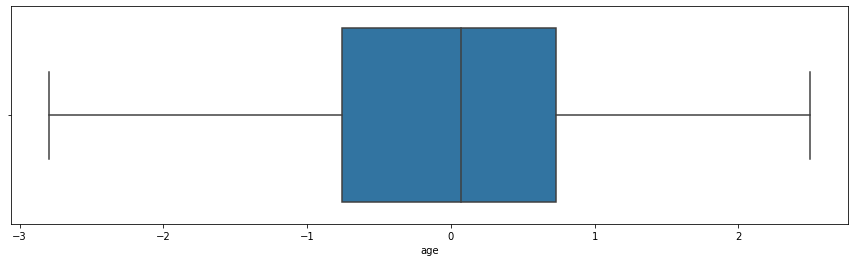

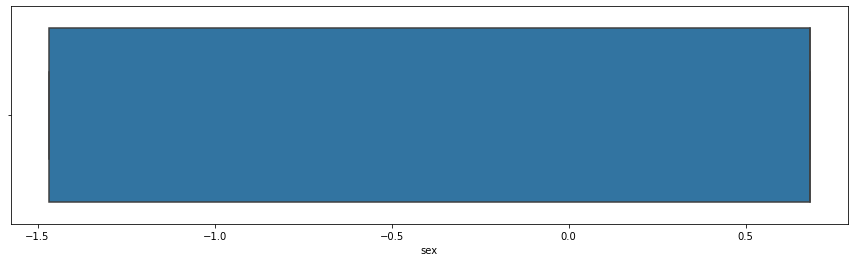

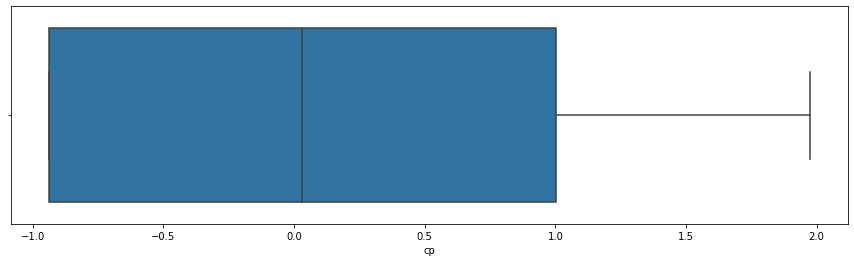

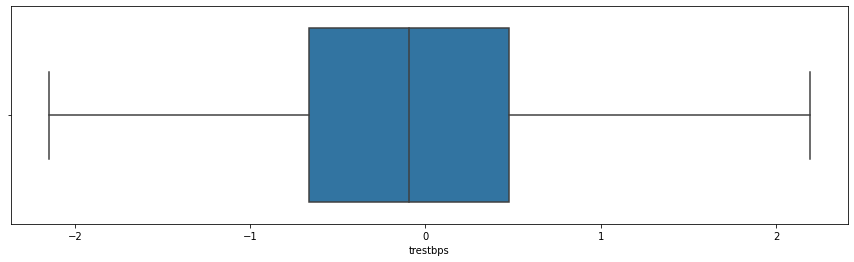

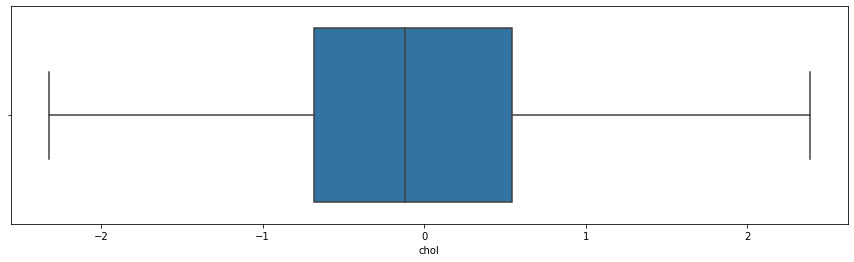

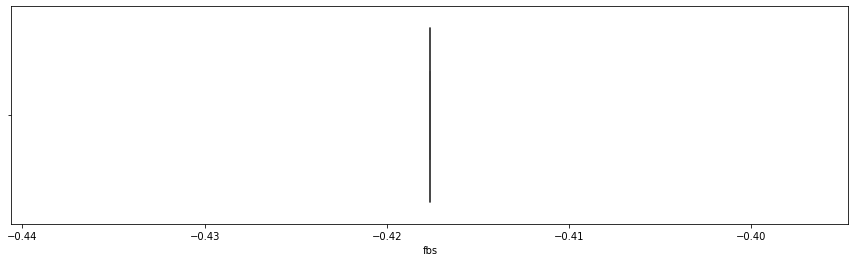

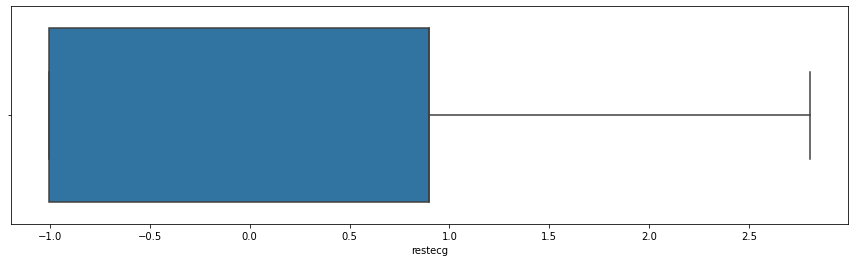

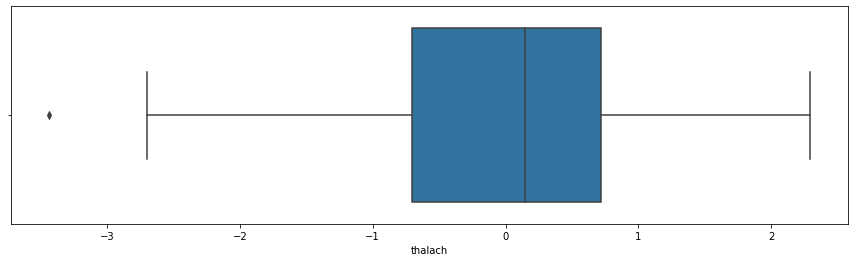

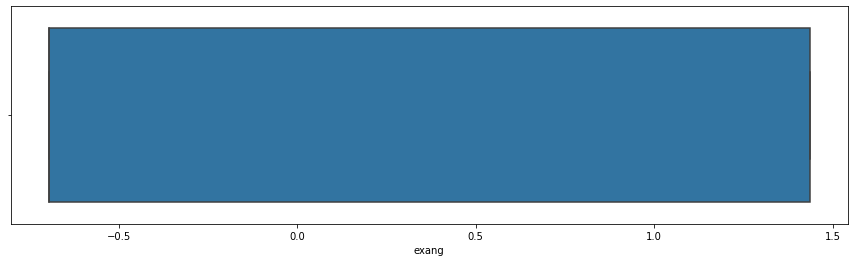

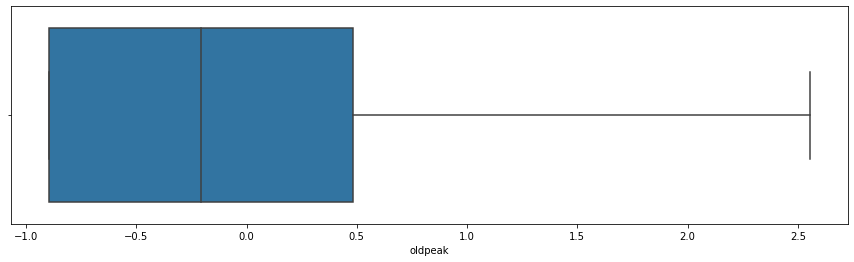

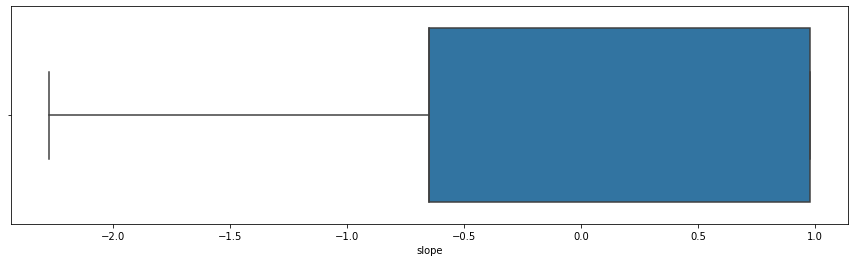

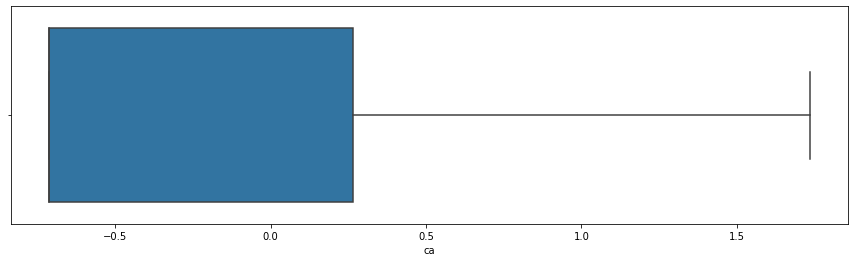

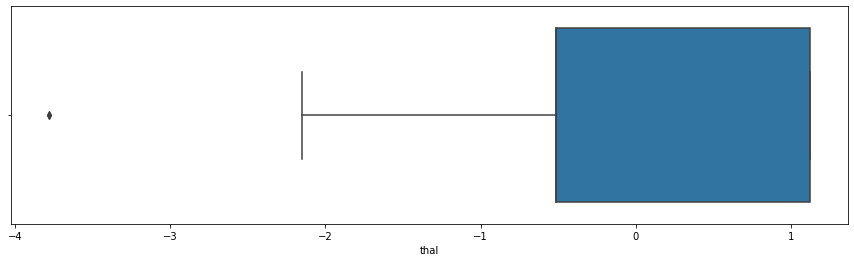

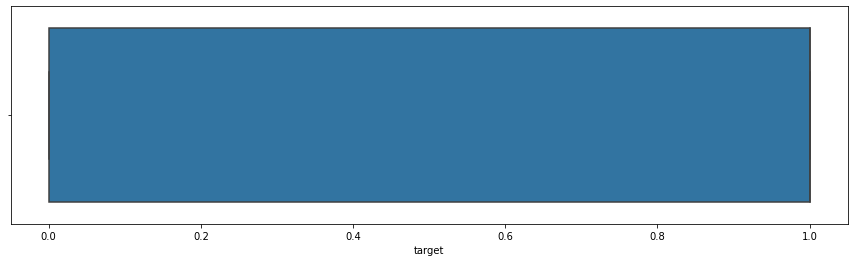

In [22]:
num_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','target']

for i in range(len(num_cols)):
    fig = plt.figure(figsize=[15,4])

    sb.boxplot(x=num_cols[i], data=df)
    
    plt.show()

<h2 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Model Building :</b><h2>

In [23]:

x= df.drop('target',axis=1)
y= df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [24]:
models = []
models.append(['RidgeClassifier',RidgeClassifier()])
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])


In [25]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = x_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

RidgeClassifier :
[[29 12]
 [ 6 44]]
Accuracy Score:  0.8021978021978022

K-Fold Validation Mean Accuracy: 82.66 %

Standard Deviation: 8.37 %

ROC AUC Score: 0.79 %

Precision: 0.79 %

Recall: 0.88 %

F1 Score: 0.83 %
----------------------------------------

XGBClassifier :
[[30 11]
 [12 38]]
Accuracy Score:  0.7472527472527473

K-Fold Validation Mean Accuracy: 85.91 %

Standard Deviation: 7.19 %

ROC AUC Score: 0.75 %

Precision: 0.78 %

Recall: 0.76 %

F1 Score: 0.77 %
----------------------------------------

Logistic Regression :
[[30 11]
 [ 8 42]]
Accuracy Score:  0.7912087912087912

K-Fold Validation Mean Accuracy: 83.12 %

Standard Deviation: 6.37 %

ROC AUC Score: 0.79 %

Precision: 0.79 %

Recall: 0.84 %

F1 Score: 0.82 %
----------------------------------------

SVM :
[[30 11]
 [11 39]]
Accuracy Score:  0.7582417582417582

K-Fold Validation Mean Accuracy: 85.95 %

Standard Deviation: 6.99 %

ROC AUC Score: 0.76 %

Precision: 0.78 %

Recall: 0.78 %

F1 Score: 0.78 %
--------

In [26]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
6,BernoulliNB,82.417582,84.090909,8.361396,0.822439,0.840000,0.84,0.840000
5,GaussianNB,80.219780,83.181818,10.985803,0.800244,0.820000,0.82,0.820000
0,RidgeClassifier,80.219780,82.662338,8.368789,0.793659,0.785714,0.88,0.830189
9,AdaBoostClassifier,80.219780,80.757576,10.650780,0.802439,0.833333,0.80,0.816327
2,Logistic Regression,79.120879,83.116883,6.371141,0.785854,0.792453,0.84,0.815534
4,KNeigbors,76.923077,84.502165,6.840786,0.765854,0.784314,0.80,0.792079
3,SVM,75.824176,85.952381,6.991342,0.755854,0.780000,0.78,0.780000
1,XGBClassifier,74.725275,85.909091,7.189569,0.745854,0.775510,0.76,0.767677
8,RandomForest,73.626374,86.385281,7.317458,0.733659,0.760000,0.76,0.760000
7,DecisionTree,73.626374,79.848485,10.846057,0.735854,0.770833,0.74,0.755102


### **Bernouli naive byes model  show highest accuracy score of 82.417**

#### Let's do hyperparameter tuning for Bernoulli & Gaussian naive byes and Adaboost Classifier

<h2 style="font-size:250%; font-family:cursive; color:#ff6666;"><b> Hyper Parameter Tunning :</b><h2>

In [27]:
grid_models = [(GaussianNB(),[{'var_smoothing': np.logspace(0,-9, num=100)}]),
               (AdaBoostClassifier(),[{'n_estimators': [0,20,50,100,200,300]}]),
               (BernoulliNB(),[{'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}])
               ]

In [28]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train,y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print(best_param)
    print('-'*25)
    print('')

 GaussianNB(): 
 Best Accuracy: 83.64 %

{'var_smoothing': 0.1}
-------------------------

 AdaBoostClassifier(): 
 Best Accuracy: 82.14 %

{'n_estimators': 20}
-------------------------

 BernoulliNB(): 
 Best Accuracy: 84.57 %

{'alpha': 1e-10}
-------------------------



              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

ROC AUC score: 0.8985365853658537
Accuracy Score:  0.8241758241758241


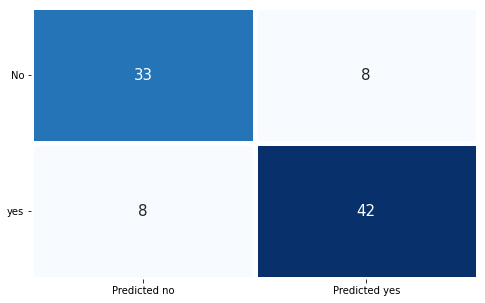

In [29]:
final_model = BernoulliNB(alpha= 1e-10).fit(x_train,y_train)
new_predictions = final_model.predict(x_test)
y_prob = final_model.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, new_predictions)
print(classification_report(y_test, new_predictions))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, new_predictions))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sb.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No', 'yes'], xticklabels = ['Predicted no', 'Predicted yes'])
plt.yticks(rotation = 0)
plt.show()

In [31]:
import pickle
filename = 'HeartPatients-prediction-model.pkl'
pickle.dump(final_model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))
print(model)

BernoulliNB(alpha=1e-10)
